<a href="https://colab.research.google.com/github/geetika18/Tensorflow-Playground/blob/main/02_Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A classification is where you try to classify something as one thing or another
A few types
* Binary classification 
* Multiclass classification
* Multilabel classification

## Creating data to view and fit


In [3]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [4]:
# Check out features
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
# Visualize data
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


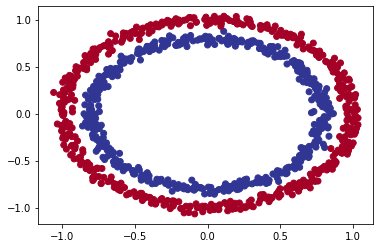

In [12]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)



In [13]:
# Input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

1. Create or import a model
2. compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [19]:
import tensorflow as tf
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(X,y,epochs=100, verbose=0)

In [20]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

Accuracy rate is only 50%. There let's make our model better by adding one more layer.

In [21]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_2.fit(X,y,epochs=100, verbose =0)

model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5100


[0.6944003105163574, 0.5099999904632568]

## Improving the model

In [22]:
circles["label"].value_counts() 


1    500
0    500
Name: label, dtype: int64

In [49]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X,y, epochs = 100, verbose=0)

model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

## Plot decision boundary
To visualize our model's predictions
* Take in a trained model, features X and y
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)

In [50]:
import numpy as np

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  # Define the axis boundaries of the plot and create a meshgrid

  x_min, x_max = X[:,0].min()- 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  y_pred = model.predict(x_in)

  #check for multiclass

  if len(y_pred[0])> 1:
    print("multi-class prediction")
    y_pred = np.argmax(y-pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  #plot the boundary
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())



doing binary classification


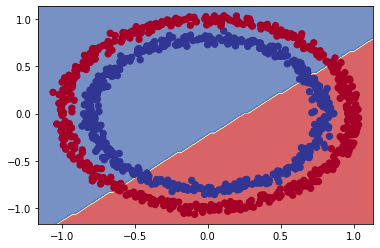

In [51]:
# checkout predictions
plot_decision_boundary(model = model_3,
                       X=X,
                       y=y)

In [73]:
# Let's see if our model works for a regression problem
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X+100

# split the data in training and testing 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit the model
#model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs = 100)

we compiled the model for binary classification but we are working on regression so lets change the model to suit our data


In [74]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

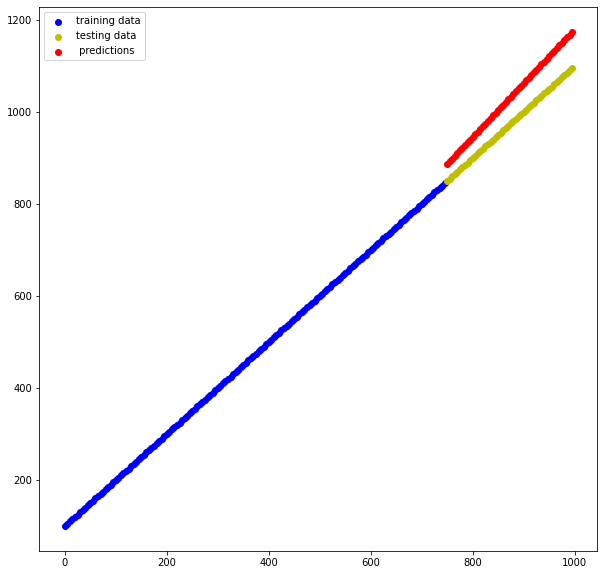

In [75]:
# make predictions
y_reg_preds = model_4.predict(X_reg_test)
plt.figure(figsize=(10,10))
plt.scatter(X_reg_train, y_reg_train, c="b", label="training data")
plt.scatter(X_reg_test, y_reg_test, c="y", label="testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label = " predictions")
plt.legend()

## Non-Linearity


In [77]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

model_5.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

doing binary classification


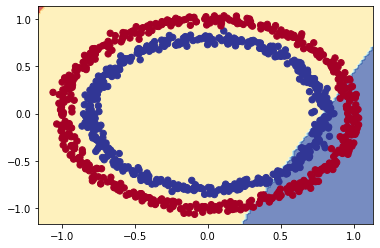

In [78]:
# checkout predictions
plot_decision_boundary(model = model_5,
                       X=X,
                       y=y)

### Let's try neural network with non linear activation function


In [93]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    #tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_6.fit(X,y, epochs=200)


Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 0.9185 - accuracy: 0.4190
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8502 - accuracy: 0.3710
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8253 - accuracy: 0.3380
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.2550
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8054 - accuracy: 0.2120
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7994 - accuracy: 0.2030
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.1640
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7906 - accuracy: 0.1520
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7864 - accuracy: 0.1440
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.1680
Epoch 11/

In [94]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 1.0000


[0.06799183040857315, 1.0]

doing binary classification


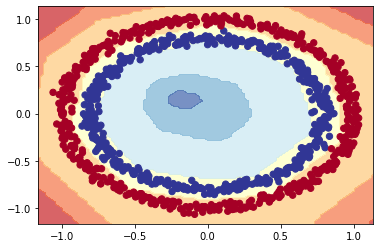

In [95]:
# checkout predictions
plot_decision_boundary(model = model_6,
                       X=X,
                       y=y)

## Final try to make model the best for this data


In [105]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7456 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7320 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7230 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7171 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.4570
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7105 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.4550
Epoch 11/

In [109]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.9810


[0.5756625533103943, 0.9810000061988831]

doing binary classification


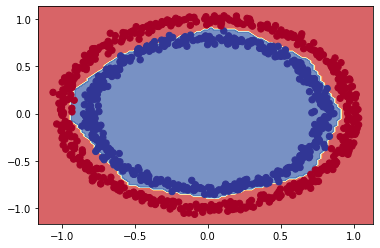

In [108]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)